seeding for reproducibility

In [1]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

importing dependencies

In [2]:
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt

data creation

In [41]:
#load and prepare the fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Data Preprocessing

In [42]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
print(train_images[0].shape)

(28, 28)


In [10]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

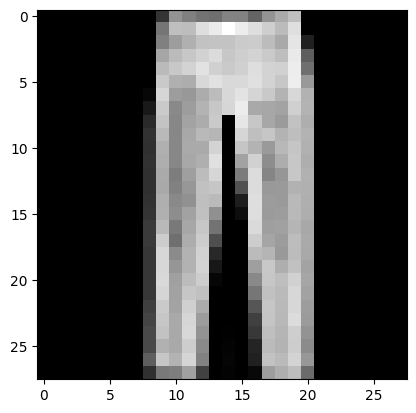

In [43]:
#display an image from the dataset
plt.imshow(train_images[16], cmap='gray')
plt.show()

In [44]:
print(train_labels[0])

9


class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [45]:
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255.0, test_images/255.0

In [46]:
#Reshape images to specify that its a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [47]:
# Split the training data into training + validation sets

validation_split = 0.2
num_train = len(train_images)
num_val = int(num_train * validation_split)

# Shuffle training data

indices = np.arange(num_train)
np.random.shuffle(indices)
train_images, train_labels = train_images[indices], train_labels[indices]

# Splitting the training data

val_images = train_images[: num_val]
val_labels = train_labels[: num_val]
train_images = train_images[num_val:]
train_labels = train_labels[num_val:]


In [48]:
train_images.shape

(48000, 28, 28, 1)

Convolutional Neural Network

In [49]:
# build the cnn
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

# add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [51]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model Training

In [52]:
len(train_images)
print(0.2 * 4800)

960.0


In [53]:
# create validation set (30% of training data)
val_images = train_images[:959]
val_labels = train_labels[:959]

In [54]:
# softmax activation for FC layer
val_images = train_images[:959]
val_labels = train_labels[:959]
history=model.fit(train_images, train_labels, epochs=10,
                 validation_data=(val_images, val_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7031 - loss: 0.7885 - val_accuracy: 0.8811 - val_loss: 0.3553
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8619 - loss: 0.3714 - val_accuracy: 0.8947 - val_loss: 0.2804
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8889 - loss: 0.3058 - val_accuracy: 0.9082 - val_loss: 0.2531
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9024 - loss: 0.2675 - val_accuracy: 0.9166 - val_loss: 0.2380
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9120 - loss: 0.2382 - val_accuracy: 0.9239 - val_loss: 0.2247
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9205 - loss: 0.2149 - val_accuracy: 0.9416 - val_loss: 0.1811
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9291 - loss: 0.1938 - val_accuracy: 0.9353 - val_loss: 0.1775
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9337 - loss: 0.1797 - val_accurac

Model Evaluation

In [55]:
#Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8982 - loss: 0.3561

Test accuracy: 0.8981999754905701


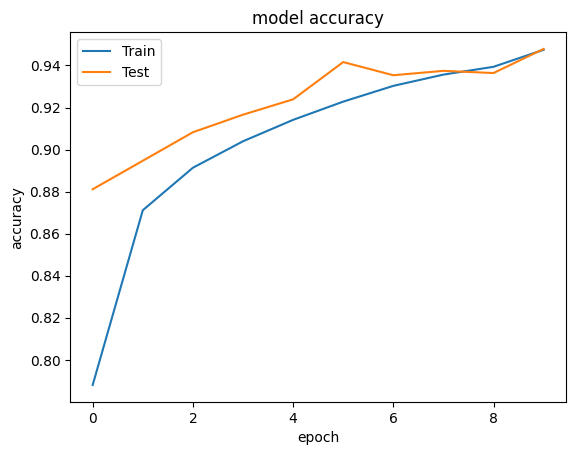

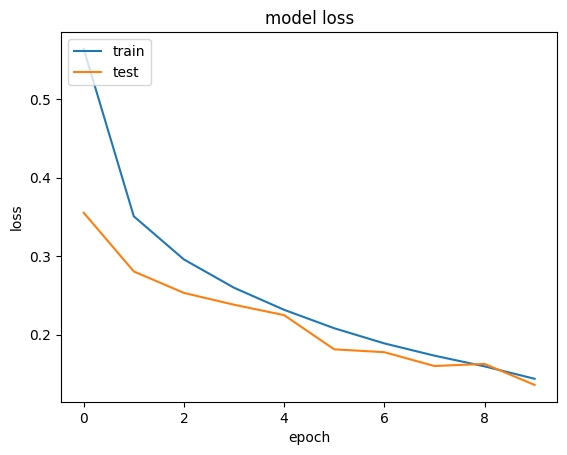

In [56]:
# plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc="upper left")
plt.show()

In [57]:
model.save('trained_fashion_mnist_model.h5')